## Requirements

- Make sure your findings are well-organized, using Markdown headers and formatting to separate sections.
- Ensure your notebook runs when all the outputs are cleared and the cells are run in order (restart your kernel, clear all outputs, and run all cells).

### Advanced Mode

Find another source of data that you suspect may have a single- or multiple-linear relationship, attempt to find a best fit model for the data, and report your findings, showing chart(s) as necessary.



In [45]:
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from matplotlib import cm
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

1) Find the linear regression equation for this data.

In [3]:
regr = linear_model.LinearRegression()
fit = regr.fit(df[[1]], df[[0]])
print('Intercept: %.3f' % regr.intercept_[0])
print('Coefficients: %.3f' % regr.coef_[0][0])

Intercept: 0.459
Coefficients: 0.203


/Users/nrogers/Desktop/IronYard/linear-regression/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


$$ Chirps/Second =  Ground Temperature * 0.203 + 0.459 $$

2) Chart the original data and the equation on the chart.

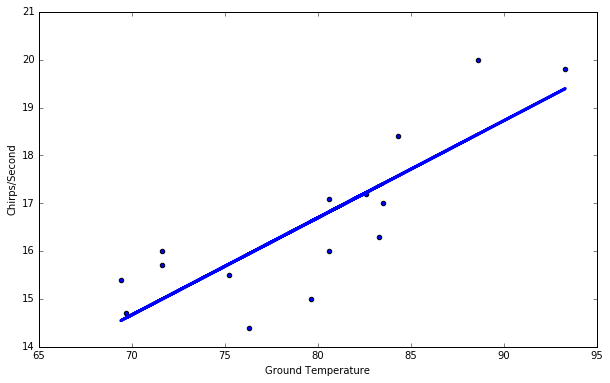

In [4]:
df.plot(kind="scatter",x="Ground Temperature", y="Chirps/Second", figsize=(10, 6))
plt.plot(df[[1]], regr.predict(df[[1]]), color='blue', linewidth=3)
#x_val = pd.DataFrame(list(range(95)))
#plt.plot(x_val, regr.predict(x_val), color='blue', linewidth=3)

3) Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)


In [5]:
print('Variance score: %.3f' % regr.score(df[[1]], df[[0]]))

Variance score: 0.692


4) Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?


In [6]:
print("Predicted chirping rate at 95 degrees: %.2f chirps/second" % regr.predict(95)[0][0])

Predicted chirping rate at 95 degrees: 19.74 chirps/second


5) Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [7]:
approx_temp = (18 - regr.intercept_[0]) / regr.coef_[0][0]
print("Approximate Temp: %.2f degrees" % approx_temp)

Approximate Temp: 86.41 degrees


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

In [8]:
brain_df = pd.read_fwf("brain_body.txt")

1) Find the linear regression equation for this data for brain weight to body weight.

In [9]:
brain_regr = linear_model.LinearRegression()
fit = brain_regr.fit(brain_df[[1]], brain_df[[0]])
print('Intercept: %.3f' % brain_regr.intercept_[0])
print('Coefficients: %.3f' % brain_regr.coef_[0][0])

Intercept: -56.856
Coefficients: 0.903


$$ Body Weight =  Brain Weight * 0.903 - 56.856$$

2) Chart the original data and the equation on the chart.

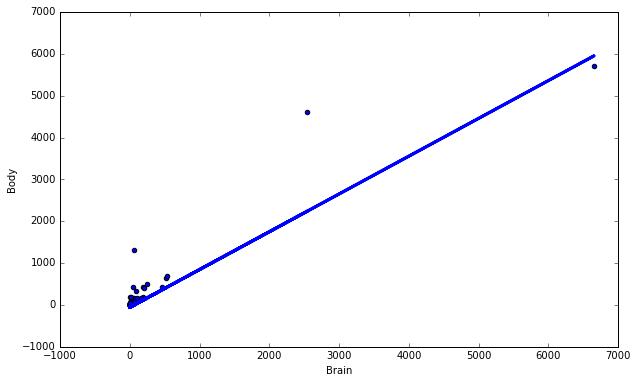

In [10]:
brain_df.plot(kind="scatter",x="Brain", y="Body", figsize=(10, 6))
plt.plot(brain_df[[0]], brain_regr.predict(brain_df[[0]]), color='blue', linewidth=3)

3) Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [11]:
print('Variance score: %.3f' % brain_regr.score(brain_df[[0]], brain_df[[1]]))


Variance score: 0.839


## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

In [41]:
sal_df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [42]:
combos = []
names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"]
for i in range(1,5):
    combos += list(it.combinations(names[:-1], i))

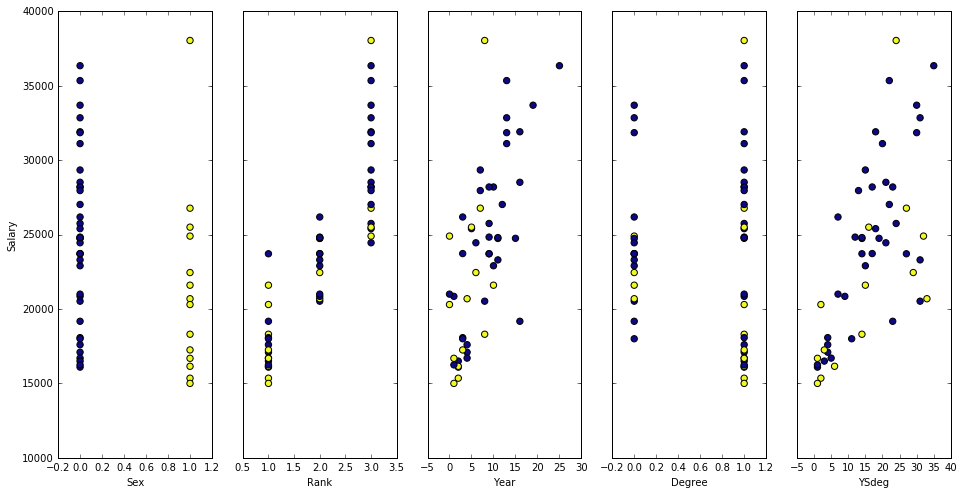

In [59]:
cmap = cm.get_cmap('plasma')
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(16, 8))
for i, name in enumerate(names[:-1]):
    sal_df.plot(kind='scatter', x=name, y="Salary", ax=axs[i], c='Sex', cmap=cmap, colorbar=False, s=40)

# sal_df.plot(kind='scatter', x='Sex', y='Salary', ax=axs[0])
# sal_df.plot(kind='scatter', x='Rank', y='Salary', ax=axs[1])
# sal_df.plot(kind='scatter', x='Year', y='Salary', ax=axs[2], c='Sex', cmap=cmap, colorbar=False)
# sal_df.plot(kind='scatter', x='Degree', y='Salary', ax=axs[3])
# sal_df.plot(kind='scatter', x='YSdeg', y='Salary', ax=axs[4])

1) Find the linear regression equation for this data using columns 1-5 to column 6.

In [60]:

# sal_regr = linear_model.LinearRegression()
# sal_regr.fit(sal_df[names[:-1]], sal_df[["Salary"]])
# coefficients = sal_regr.coef_[0]
# for i in range(5):
#     print("{} Coefficient: {:.2f}".format(names[i], float(coefficients[i])))
# print('Intercept: %.3f' % sal_regr.intercept_[0])



for combo in combos:
    categories = list(combo)
    print("Salary vs {}".format(categories))
    sal_regr = linear_model.LinearRegression()
    sal_regr.fit(sal_df[categories], sal_df[[5]])
    names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"]
    coefficients = sal_regr.coef_[0]
    print('Intercept: %.3f' % sal_regr.intercept_[0])
    print('Variance score: %.3f' % sal_regr.score(sal_df[categories], sal_df[[5]]))
    for i in range(len(combo)):
        print("{} Coefficient: {:.2f}".format(names[i], float(coefficients[i])))
    print('')

Salary vs ['Sex']
Intercept: 24696.789
Variance score: 0.064
Sex Coefficient: -3339.65

Salary vs ['Rank']
Intercept: 11663.143
Variance score: 0.753
Sex Coefficient: 5952.78

Salary vs ['Year']
Intercept: 18166.148
Variance score: 0.491
Sex Coefficient: 752.80

Salary vs ['Degree']
Intercept: 24359.222
Variance score: 0.005
Sex Coefficient: -858.87

Salary vs ['YSdeg']
Intercept: 17502.257
Variance score: 0.455
Sex Coefficient: 390.65

Salary vs ['Sex', 'Rank']
Intercept: 12041.938
Variance score: 0.755
Sex Coefficient: -738.13
Rank Coefficient: 5864.44

Salary vs ['Sex', 'Year']
Intercept: 18065.405
Variance score: 0.491
Sex Coefficient: 201.47
Rank Coefficient: 759.01

Salary vs ['Sex', 'Degree']
Intercept: 25089.925
Variance score: 0.066
Sex Coefficient: -3288.16
Rank Coefficient: -622.47

Salary vs ['Sex', 'YSdeg']
Intercept: 18355.233
Variance score: 0.493
Sex Coefficient: -2572.53
Rank Coefficient: 380.69

Salary vs ['Rank', 'Year']
Intercept: 11336.665
Variance score: 0.844
Sex

2) Find the selection of columns with the best $R^2$ score.

In [ ]:
print('Total Variance score: %.2f' % sal_regr.score(sal_df[[0,1,2,3,4]], sal_df[[5]]))

sal_regr.score(sal_df[[0]], sal_df[[5]])

#for j in range(5):
    #print(sal_df[[j]])
    #print(sal_regr.score(sal_df[[j]], sal_df[[5]]))
    #print("{} Variance score: {:.2f}".format(names[i], sal_regr.score(sal_df[[j]], sal_df[[5]])))

3) Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.